# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
output_data = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# print to logger
print("Beginning Data Retrieval  ")
print("------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp_max = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_temp_max,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval  
------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | khanty-mansiysk
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | usinsk
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | deder
Processing Record 10 of Set 1 | fort-shevchenko
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | tynda
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | bubaque
Processing Record 19 of Set 1 | leava
Processing Record 20 of Set 1 | togur
Processing Record 21 of Set 1 | hit
Processing Record 22 of Set 1 | stanley
Processing Record 23 of

Processing Record 42 of Set 4 | kuanda
Processing Record 43 of Set 4 | villa gesell
Processing Record 44 of Set 4 | yigo village
Processing Record 45 of Set 4 | kourou
Processing Record 46 of Set 4 | bardsir
Processing Record 47 of Set 4 | petropavlovsk-kamchatsky
Processing Record 48 of Set 4 | murun-kuren
Processing Record 49 of Set 4 | ahau
City not found. Skipping...
Processing Record 0 of Set 5 | bechar
Processing Record 1 of Set 5 | kirakira
Processing Record 2 of Set 5 | benjamin constant
Processing Record 3 of Set 5 | bonthe
Processing Record 4 of Set 5 | brookings
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | tamanrasset
Processing Record 8 of Set 5 | lebu
Processing Record 9 of Set 5 | as sulayyil
Processing Record 10 of Set 5 | callao
Processing Record 11 of Set 5 | punta arenas
Processing Record 12 of Set 5 | pangody
Processing Record 13 of Set 5 | hermanus
Processing Record 14 of Set 5 | tranovaho
Ci

Processing Record 32 of Set 8 | metro
Processing Record 33 of Set 8 | kuqa
Processing Record 34 of Set 8 | zarghun shahr
Processing Record 35 of Set 8 | mamuju
Processing Record 36 of Set 8 | kiffa
Processing Record 37 of Set 8 | ambagarh chauki
Processing Record 38 of Set 8 | macapa
Processing Record 39 of Set 8 | kayes
Processing Record 40 of Set 8 | darovskoy
Processing Record 41 of Set 8 | undurkhaan
Processing Record 42 of Set 8 | sarh
Processing Record 43 of Set 8 | dongcun
Processing Record 44 of Set 8 | puerto aysen
Processing Record 45 of Set 8 | labuan bajo
Processing Record 46 of Set 8 | nelson bay
Processing Record 47 of Set 8 | benguela
Processing Record 48 of Set 8 | veinticinco de mayo
Processing Record 49 of Set 8 | ngunut
Processing Record 0 of Set 9 | aileu
Processing Record 1 of Set 9 | hohhot
Processing Record 2 of Set 9 | kingston
Processing Record 3 of Set 9 | savannakhet
Processing Record 4 of Set 9 | holualoa
Processing Record 5 of Set 9 | pimentel
Processing Re

Processing Record 24 of Set 12 | mukalla
Processing Record 25 of Set 12 | cooma
Processing Record 26 of Set 12 | batticaloa
Processing Record 27 of Set 12 | catemaco
Processing Record 28 of Set 12 | mwinilunga
Processing Record 29 of Set 12 | rondonopolis
Processing Record 30 of Set 12 | puerto lempira
Processing Record 31 of Set 12 | chernogorsk
Processing Record 32 of Set 12 | kolondieba
Processing Record 33 of Set 12 | ardakan
Processing Record 34 of Set 12 | bengkulu
Processing Record 35 of Set 12 | lucea
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-17.91,71,100,2.57,CA,1707282273
1,port-aux-francais,-49.3500,70.2167,7.10,99,100,4.42,TF,1707282273
2,khanty-mansiysk,61.0042,69.0019,0.06,93,75,6.00,RU,1707282457
3,longyearbyen,78.2186,15.6401,-9.09,73,40,7.72,SJ,1707282285
4,adamstown,-25.0660,-130.1015,24.72,88,95,6.90,PN,1707282274


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

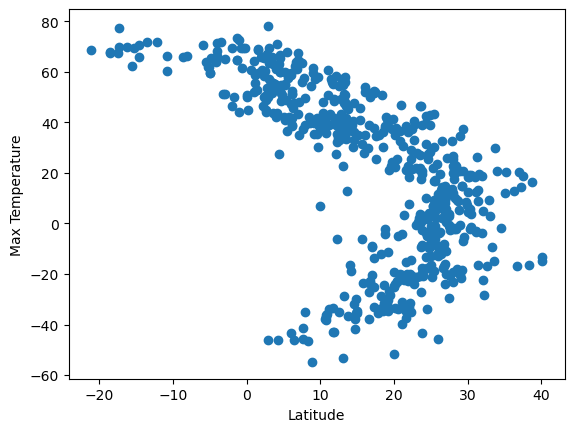

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

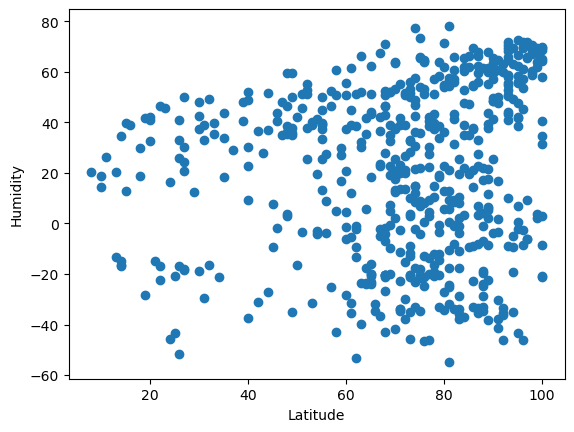

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

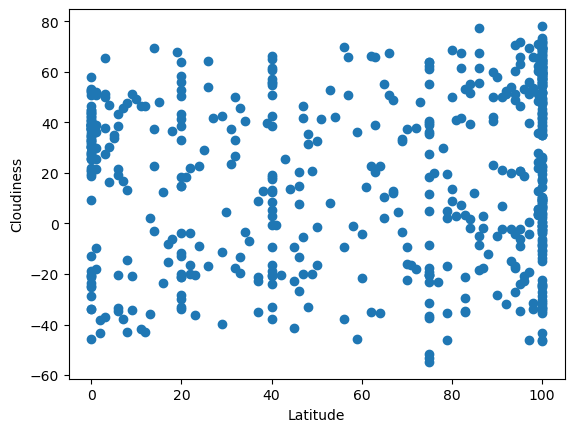

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

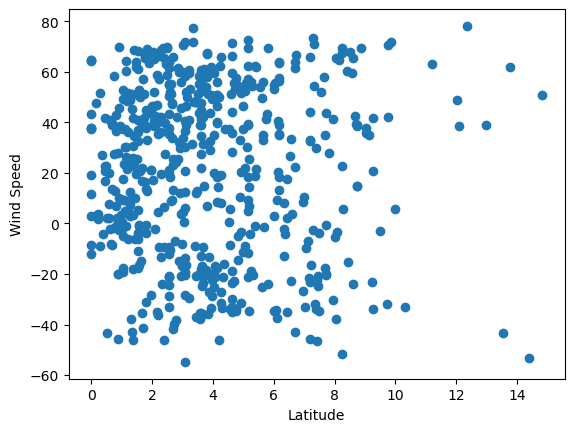

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regress(x,y, eqn_coordinates):
    r=st.pearsonr(x,y)
    print(f"The r-value is: {r[0]}")
    (slope,intercept,rvalue,pvalue,stderr)= linregress(x,y)
    regress_values=x * slope + intercept
    line_eq= f"y={slope: .2f}x +{intercept: .2f}"
    plt.plot(x,regress_values, "r-")
    plt.annotate(line_eq,eqn_coordinates,fontsize=12,color="red")
    plt.scatter(x,y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.846254818682536


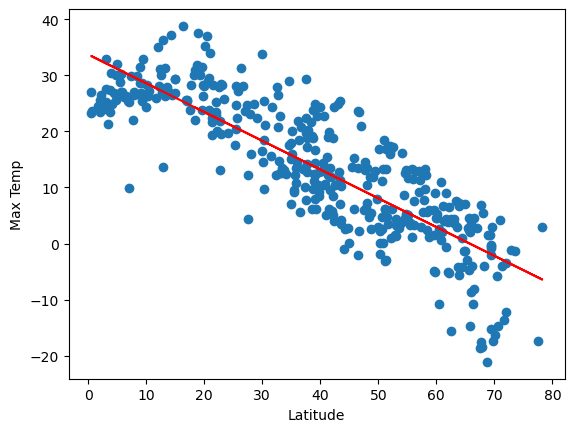

In [26]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Max Temp"],(10,-30))

The r-value is: 0.6419546065421795


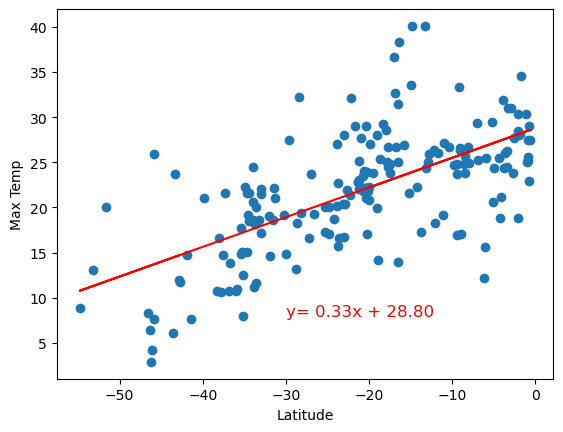

In [27]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Max Temp"],(-30,8))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23853179129394048


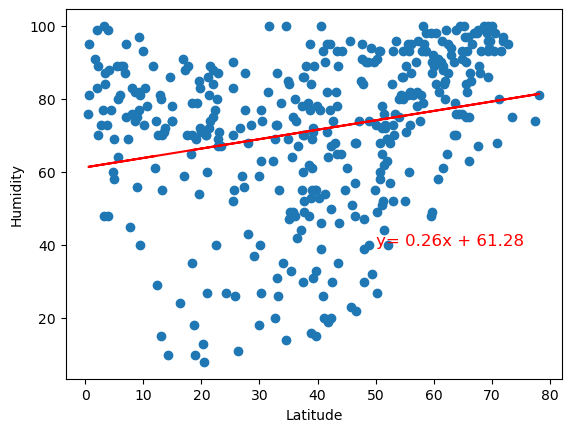

In [28]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Humidity"],(50,40))

The r-value is: 0.01675931695005681


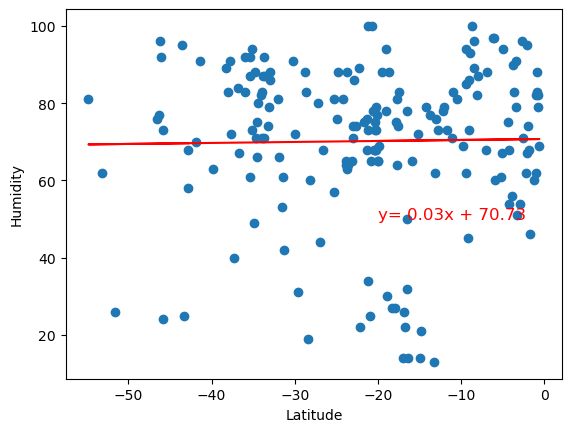

In [29]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"],(-20,50))

 negative correlation between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15500489387697097


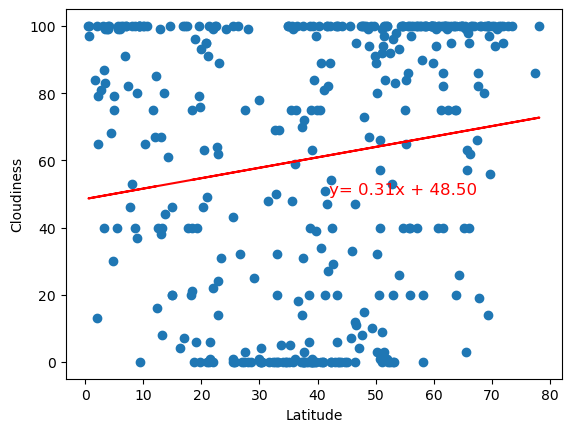

In [30]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Cloudiness"],(42,50))

The r-value is: 0.14341322916643245


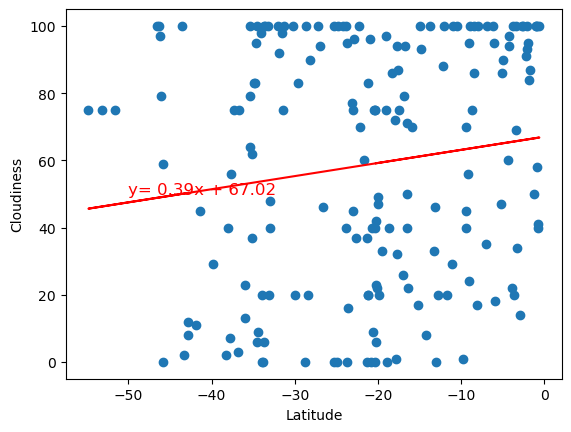

In [31]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Cloudiness"],(-50,50))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903336


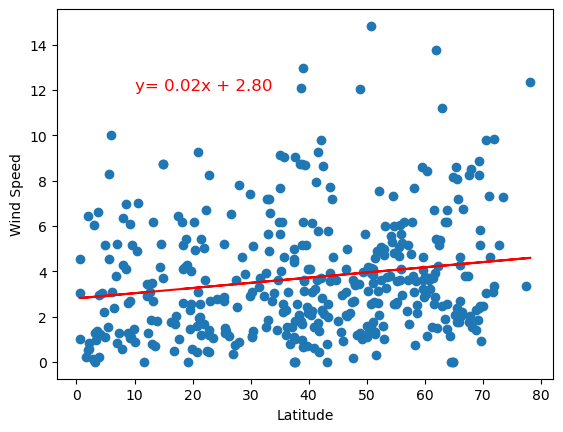

In [32]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Wind Speed"],(10,12))

The r-value is: -0.2494775354626458


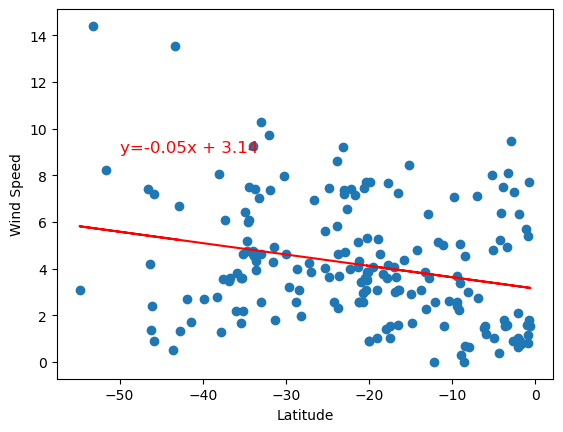

In [33]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Wind Speed"],(-50,9))